In [28]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
import matplotlib.pyplot as plt

In [29]:
df = pd.read_excel('result_uma.xlsx')

In [30]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [31]:
df.head()

,hopes,snr,kable,BER,opoznenie,bandwith,protokol,straty,class
0,2,32.768003,0,4.308369,1.792578,457.862620,0,0.000000,0
1,2,41.411371,0,292.226505,1.994106,2204.653993,1,18.076263,1
2,4,46.025630,0,75.786510,0.134042,2280.585376,1,75.461326,1
3,3,52.440110,0,14.301459,2.556367,1993.091686,0,0.000000,0
4,6,67.352808,1,24.073524,0.770134,1883.972531,1,33.455956,1


In [53]:
#initiation decision tree
decision_tree_classifier = DecisionTreeClassifier(random_state=123, max_depth=4)


In [54]:
clf = decision_tree_classifier.fit(df.drop('class',axis=1),df['class'])

In [55]:
from sklearn.tree import export_graphviz
tree_structure = export_graphviz( 
 clf,
 out_file=None,
 feature_names=df.columns[:-1],
 class_names=['0','1','2'],
 filled=True,
)
print(tree_structure)

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="snr <= 69.999\ngini = 0.631\nsamples = 462\nvalue = [97, 219, 146]\nclass = 1", fillcolor="#d1f9e2"] ;
1 [label="protokol <= 0.5\ngini = 0.547\nsamples = 307\nvalue = [97, 180, 30]\nclass = 1", fillcolor="#b1f5cd"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="opoznenie <= 5.024\ngini = 0.484\nsamples = 127\nvalue = [75, 52, 0]\nclass = 0", fillcolor="#f7d8c2"] ;
1 -> 2 ;
3 [label="bandwith <= 680.835\ngini = 0.309\nsamples = 68\nvalue = [55, 13, 0]\nclass = 0", fillcolor="#eb9f68"] ;
2 -> 3 ;
4 [label="gini = 0.42\nsamples = 10\nvalue = [3, 7, 0]\nclass = 1", fillcolor="#8ef0b7"] ;
3 -> 4 ;
5 [label="gini = 0.185\nsamples = 58\nvalue = [52, 6, 0]\nclass = 0", fillcolor="#e89050"] ;
3 -> 5 ;
6 [label="snr <= 50.21\ngini = 0.448\nsamples = 59\nvalue = [20, 39, 0]\nclass = 1", fillcolor="#9ff2c2"] ;
2 -> 6 ;
7 [label="gini = 0.444\nsam

In [56]:
dfp = pd.read_excel('predict100.xlsx')
df_copy = dfp.copy()
df_pred = df_copy.drop(df_copy.columns[-1], axis=1)

df_pred.head()




,hopes,snr,kable,BER,opoznenie,bandwith,protokol,straty
0,4,61.352710,0,84.926639,0.869536,776.155976,1,12.519843
1,3,46.688936,1,61.448371,10.831340,1957.122962,1,17.894599
2,6,84.582402,1,465.831337,2.700141,3860.046967,0,0.000000
3,5,61.252672,1,36.910979,0.663554,2581.233799,0,0.000000
4,3,44.032496,1,13.803191,1.094436,750.398397,0,0.000000


In [57]:
dfp = pd.read_excel('predict100.xlsx')
df_copy = dfp.copy()
df_pred = df_copy.drop(df_copy.columns[-1], axis=1)

df_expect = dfp.iloc[:, -1]

predictions=clf.predict(df_pred)
expected_classes =df_expect.values
print(predictions)
print(expected_classes)

[1 1 2 0 0 1 2 1 1 0 2 1 1 1 2 1 2 1 0 1 1 0 2 1 1 2 2 0 0 1 1 1 2 1 0 1 2
 2 1 1 1 0 0 1 1 2 1 1 2 1 2 1 2 1 2 1 2 0 2 1 2 2 1 1 1 0 1 0 2 1 2 0 0 2
 1 0 0 1 1 1 2 0 2 2 1 1 1 1 0 1 2 1 1 2 1 1 2 1 1 2 2 2 2 1 1 1 0 2 2 1 2
 2 1 1 1 2 1 1 1 2]
[1 1 2 0 0 1 2 1 1 1 2 1 1 1 1 0 2 1 0 1 1 0 1 0 1 1 2 0 0 1 1 1 2 1 0 1 2
 2 1 1 1 0 1 2 1 2 1 1 2 1 2 1 2 1 2 0 2 0 1 1 2 1 1 2 1 0 1 0 1 1 2 0 0 2
 1 0 0 1 1 1 2 1 2 2 1 1 1 1 0 2 2 1 1 2 1 1 2 1 1 2 2 2 2 1 1 1 0 2 1 1 2
 0 1 1 1 2 1 1 1 2]


In [58]:
accuracy = sum(predictions == expected_classes) / len(expected_classes) * 100
print("Accuracy:", accuracy)

Accuracy: 85.83333333333333


In [59]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(expected_classes, predictions)
print("Confusion matrix:")
print(confusion)

Confusion matrix:
[[17  3  1]
 [ 3 55  7]
 [ 0  3 31]]


In [60]:
from sklearn.metrics import classification_report
classification_report = classification_report(expected_classes, predictions)
print("Classification Report:")
print(classification_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        21
           1       0.90      0.85      0.87        65
           2       0.79      0.91      0.85        34

    accuracy                           0.86       120
   macro avg       0.85      0.86      0.85       120
weighted avg       0.86      0.86      0.86       120



In [62]:
from sklearn.preprocessing import label_binarize

# ro binary
binarized_expected_classes = label_binarize(expected_classes, classes=[0, 1, 2])

# prawdopodobieństwa klas
binarized_y_scores = clf.predict_proba(df_pred)

#  ROC-krzywe i AUC-ROC dla każdej klasy
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(binarized_expected_classes.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(binarized_expected_classes[:, i], binarized_y_scores[:, i])
    roc_auc[i] = roc_auc_score(binarized_expected_classes[:, i], binarized_y_scores[:, i])

# Wizualizacja  ROC-krzywej dla każdej klasy
plt.figure()
for i in range(binarized_expected_classes.shape[1]):
    plt.plot(fpr[i], tpr[i], label='ROC curve (class {0}) (AUC = {1:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#  AUC-ROC dla każdej klasy 
for i in range(binarized_expected_classes.shape[1]):
    print("AUC-ROC Score (class {0}): {1:.2f}".format(i, roc_auc[i]))


NameError: name 'roc_curve' is not defined

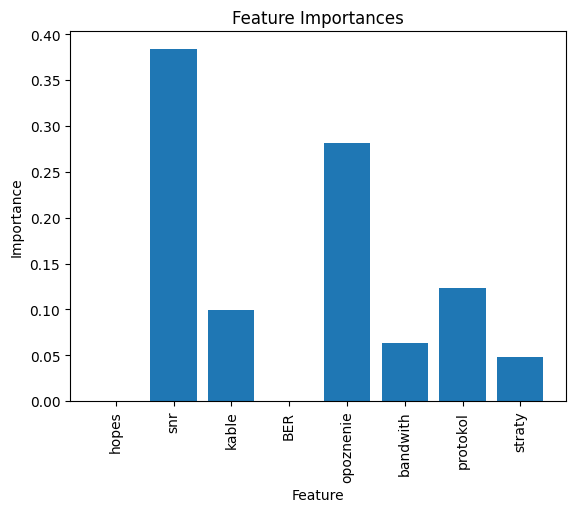

In [63]:
feature_importances = clf.feature_importances_
feature_names = df_pred.columns

# ważnosc
plt.bar(feature_names, feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()